# <span style='color:blue'>Lab 3</span>
## <span style='color:blue'> <u>Association Rule Mining

### Group Members
- Helene Barrera
- Feby Thomas
- John Olanipekun
- Justin Ehly

#### <span style='color:blue'><u> Lab 3 Executive Summary </u></span>
This is a project focused on Mining Association Rules from the MovieLens Small data set, officially called ML-Latest-small data set from GroupLens with movie genre information from THDb (The Movie DB) where is missing in the original dataset. In mining rules from this data we seek to find associations among movie genres and how they may or may not related to whether a movie watcher posted an online tag and what associations exist among and between the genres, usage of tags and the corresponding movie rating (0-5 in 0.5 increments). 

#### <span style='color:blue'><u>Citation/ Attribution of data sources:</u></span>
- F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. https://doi.org/10.1145/2827872 <br><br>
- [The Movie DB](https://www.themoviedb.org/?language=en-US)
[](https://www.themoviedb.org/?language=en-US)


---
## Instructions
In the final assignment for this course, you will be using one of three different analysis methods:
- **Option A:** Use clustering on an unlabeled dataset to provide insight or features
- <span style='color:blue'>**Option B:** Use transaction data for mining associations rules</span>
- **Option C:** Use collaborative filtering to build a custom recommendation system<br><br>
Your choice of dataset will largely determine the task that you are trying to achieve, though the dataset does not need to change from your previous tasks.<br><br>
- For example, you might choose to use clustering on your data as a preprocessing step that extracts different features. Then you can use those features to build a classifier and analyze its performance in terms of accuracy (precision, recall) and speed.
- Alternatively, you might choose a completely different dataset and perform rule mining or build a recommendation system.
---

---
## Dataset Selection and Toolkits
<br>
As before, you need to choose a dataset that is not small. It might be massive in terms of the number of attributes (or transactions), classes (or items, users, etc.) or whatever is appropriate for the task you are performing. Note that scikit-learn can be used for clustering analysis, but not for Association Rule Mining (you should use R) or collaborative filtering (you should use graphlabcreate from Dato). Both can be run using Jupyter notebooks as shown in lecture.<br><br>
- One example of a recommendation dataset is the movie lens rating data: http://grouplens.org/ datasets/movielens/  
<br>
- Some examples of association rule mining datasets: http://fimi.ua.ac.be/data/ <br>
<br>
Write a report covering in detail all the steps of the project. The results need to be reproducible using only this report. <br>
Describe all assumptions you make and include all code you use in the Jupyter notebook or as supplemental functions. 
<br><br>
<b>Follow the CRISP-DM framework in your analysis (you are performing all of the CRISP-DM outline).</b>
<br><br>
<span style='color:red'> <b><u>This report is worth 20% of the final grade.</u></b>  </span>
<br>

---

---
## <span style='color:blue'>Business Understanding [10 points]</span>
###### <span style='color:blue'>1. Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?).</span> 

---

We chose to use the MovieLens Small data set, officially called ML-Latest-small data set from GroupLens in order to gain experience working with transaction data and association rules mining. The dataset consists of 4 different comma separated files containing links, movies, ratings and tags. The links file contains unique ID's for each movie (movieId) in the dataset as well as each movie's corresponding IMDB (imdbId) unique ID and themoviedb.org unique ID (tmdbId).
* 100k movie ratings
* 3,600 tags
* 9,000 movies (titles)
* 600 users (by userId only)

Citations:
F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. https://doi.org/10.1145/2827872

TMDB API Documentation:  
https://www.themoviedb.org/documentation/api/wrappers-libraries  
Python Library: https://github.com/celiao/tmdbsimple/    

IMDB API Documentation:
https://developer.imdb.com/documentation  


###### <span style='color:blue'>2. How will you measure the effectiveness of a good algorithm? </span>
--

Ways to measure association rules mining using the apriori algorithm in R are using Support, Confidence and Lift.
We are going to use Lift as our primary measure to order our results by since we are interested in the ratio of confidence to support on how the genres, ratings and if a tag is included are grouped.
For example if {chilren, fantasy, action} => {family} compared to how oftern {chilren, fantasy, action} appears in the dataset.


###### <span style='color:blue'>3. Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?</span>
--
Using lift as our chosen validarion method makes sense for this dataset because we are interested in knowing how the genres match up in itemsets as well as how they match up with user tags (aka comments) and individual ratings (0-5 on a 0.5 increment).


---
## Data Understanding [20 points total]
### <span style='color:blue'>Data Wrangling [10 points]</span>
<b>Questions are answered further down after the wranling is complete and the dataset is shaped</b>

---

In [1]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import copy
%matplotlib inline
# from ICA 5
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

# points to location of my R libraries
lib_loc = 'C:/Users/justi/.conda/pkgs/rpy2-3.4.4-py38r36h10235a5_0/R/win-library/4.1'

os.chdir('C:/Users/justi/GitHub/Lab 3/data')  #windows
#os.chdir('/mnt/c/Users/justi/GitHub/Lab 3/data') #ubuntu

In [2]:
# let's get some data!
ratings = pd.read_csv('ratings.csv')
items = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

#print out our data
print('\n- - - - - Ratings- - - - - \n')
print(ratings.head())
print(ratings.info())
print('\n- - - - - Items- - - - - - \n')
print(items.head())
print(items.info())
print('\n- - - - - Tags- - - - - - -\n')
print(tags.head())
print(tags.info())
print('\n- - - - - Links- - - - - - \n')
print(links.head())
print(links.info())


- - - - - Ratings- - - - - 

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

- - - - - Items- - - - - - 

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   



In [3]:
#how many genres does each movie have associated with it (keep in mind the ones missing a genre count as 1)
movgenres = items.genres.str.count('\|')+1
movgenres.value_counts()

2     3218
1     2851
3     2338
4      987
5      271
6       63
7       12
8        1
10       1
Name: genres, dtype: int64

---
---

##### <span style='color:blue'>Explore missing values</span>
###### ---------------items.csv---------------
---

In [4]:
# make a dataframe of missing genres and their corresponding tmdbId's so we can try to find their genres
idx = items[items.genres.str.contains('no genres')].index
idx
missing = items.iloc[idx,:]
missing = missing.merge(links, on='movieId', how='left')
print('Missing Data: %d records are missing genre from the items.csv file' % missing.movieId.count())

# go ahead and drop those values from the items dataset because it is easier to add them back in later
items.drop(index=idx,inplace=True)

Missing Data: 34 records are missing genre from the items.csv file


In [5]:
missing.head()

,movieId,title,genres,imdbId,tmdbId
0,114335,La cravate (1957),(no genres listed),121731,32891.0
1,122888,Ben-hur (2016),(no genres listed),2638144,271969.0
2,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),1790809,166426.0
3,129250,Superfast! (2015),(no genres listed),2933474,325358.0
4,132084,Let It Be Me (1995),(no genres listed),113638,335145.0


In [6]:
items.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
# log into tmdb to pull the missing genres
# communicate with the movie database and pull all crew information for each movie in the links df
# if there's no match to the provided tmdbId then just assign the list position to 0 so we can deal with it later


# set up the the movie database library and API key
import tmdbsimple as tmdb
tmdb.API_KEY = '19f654e762815e69826afb4f2939d599'

# grab what data is available from the tmdb server 
from progressbar import ProgressBar
pbar = ProgressBar()
tm = []
for i in pbar(range(len(missing))):
    try: 
        tm.append(tmdb.Movies(missing.tmdbId[i]))
    except:
        tm.append(0)

# pull just the tmdbId's and genre information out of the downloaded list of dictionaries
# also print so we know how 
replace_miss_values = []
count = 0
for x in range(len(tm)):
    try:
        replace_miss_values.append({k: v for k,v in tm[x].info().items() if k in ['id','genres']})
    except: 
        count +=1
print('There were %d missing tmdbId\'s returned'% count)

tm_dic = [{k: v for k,v in replace_miss_values[i].items()} for i in range(len(replace_miss_values))]
#print(tm_dic)

100% |########################################################################|


There were 7 missing tmdbId's returned


In [8]:
# overall goal make a new df to fill in some of the missing genre values
ids = []
mgs = []

for i in range(len(tm_dic)):
    for r in range(len(tm_dic[i]['genres'])):
                   ids.append(tm_dic[i]['id'])
                   mgs.append(tm_dic[i]['genres'][r]['name'])
                   
miss_gens = pd.DataFrame({'tmdbId': ids,
                        'genres':mgs})

miss_gens.head()

# see if we picked up any new genres - if so we will drop them to keep the dataset as intact as possible
new_genres = pd.Series(miss_gens.genres.unique())

# list of the unique values from items.genres
given = pd.DataFrame(items.genres.str.split('\|', expand=True)) 
sets = given[0]
for s in range(1,9):
    sets = sets.append(given[s])
given = pd.Series(sets.unique())
#sorted(given)
#sorted(missing)


del given[19]
given[18] = 'no genre'
given.sort_values(inplace=True, ignore_index=True)
new_genres.sort_values(inplace=True, ignore_index=True)
#print(given,'\n', new_genres)                   


In [9]:
# need to add the movieIds back into the miss_gens df, drop the other id's
miss_gens = miss_gens.merge(links, on='tmdbId', how='left')
miss_gens.drop(columns = ['tmdbId', 'imdbId'], inplace=True)
miss_gens.head()

,genres,movieId
0,Fantasy,114335
1,Action,122888
2,History,122888
3,Adventure,122888
4,Drama,122888


In [10]:
# now we need to make miss_gens match items genres formatting

df = copy.deepcopy(miss_gens)
ids = df.movieId.ne(df.movieId.shift()).cumsum()  # blocks of rows that share the same movieId
df = df.groupby(ids, as_index=False).agg({'movieId': 'first', 'genres': '|'.join}) # group by tmdbId and combine the directors
print(df.isna().value_counts()) # check for missing values
print(df.head()) #preview the grouped df
miss_gens = df

movieId  genres
False    False     27
dtype: int64
   movieId                          genres
0   114335                         Fantasy
1   122888  Action|History|Adventure|Drama
2   122896        Adventure|Action|Fantasy
3   129250                   Action|Comedy
4   132084                         Romance


In [11]:
# Replace missing values in items df
missing.drop(columns=['genres','imdbId','tmdbId'],inplace=True)
missing = missing.merge(miss_gens, on='movieId', how='left')
missing

,movieId,title,genres
0,114335,La cravate (1957),Fantasy
1,122888,Ben-hur (2016),Action|History|Adventure|Drama
2,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,Adventure|Action|Fantasy
3,129250,Superfast! (2015),Action|Comedy
4,132084,Let It Be Me (1995),Romance
5,134861,Trevor Noah: African American (2013),Comedy
6,141131,Guardians (2016),Action|Fantasy|Science Fiction
7,141866,Green Room (2015),Horror|Crime|Thriller
8,142456,The Brand New Testament (2015),Drama|Comedy|Fantasy
9,143410,Hyena Road,War|Drama|Thriller


In [12]:
# add the missing genres and movie titles back into the items df
items = items.append(missing, ignore_index=True)

In [13]:
items[items.genres.isna()==True]

,movieId,title,genres
9718,147250,The Adventures of Sherlock Holmes and Doctor W...,NaN
9728,167570,The OA,NaN
9730,171495,Cosmos,NaN
9732,171749,Death Note: Desu nôto (2006–2007),NaN
9734,172497,T2 3-D: Battle Across Time (1996),NaN
9736,173535,The Adventures of Sherlock Holmes and Doctor W...,NaN
9737,174403,The Putin Interviews (2017),NaN


In [14]:
items.dropna(axis=0, inplace=True,)

In [15]:
items.genres.isna().value_counts()

False    9735
Name: genres, dtype: int64

In [16]:
# we are still left with 7 movies that have no genres, we will drop those
idx = items[items.genres.isna()==True].index
items.drop(index=idx,inplace=True)
items.reset_index(inplace=True,drop=True)
items[items.genres.isna()==True]

,movieId,title,genres


In [17]:
items

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9730,172591,The Godfather Trilogy: 1972-1990 (1992),Crime|Drama
9731,176601,Black Mirror,Drama
9732,181413,Too Funny to Fail: The Life and Death of The D...,Documentary|Comedy
9733,181719,Serving in Silence: The Margarethe Cammermeyer...,Drama|TV Movie



##### some notes
* Music and Musical will merge since the binary split is done using the first the
* letters of the genre anyhow
* TV Movie, nothing is coming up


###### ------Ratings------

In [18]:
# let's see if we are missing any ratings informatio
print(ratings[ratings.isna() == True].value_counts())


Series([], dtype: int64)


###### ------Tags------

In [19]:
tags.isna().value_counts()

userId  movieId  tag    timestamp
False   False    False  False        3683
dtype: int64

###### ------Links------

In [20]:
links.isna().value_counts()

movieId  imdbId  tmdbId
False    False   False     9734
                 True         8
dtype: int64

In [21]:
idx = links[links.tmdbId.isna() == True].index # we will keep this mind when use the movie db to impute missing values
links.drop(index=idx, inplace=True)
links[links.tmdbId.isna() == True]

,movieId,imdbId,tmdbId


---
##### Create binary matrix for the genres
We will follow the zoo example from week 12's codebook

---

In [22]:
# create a binary matrix for the genres (this follows along the zoo examples from week 12)
genres = pd.DataFrame(items.genres.str.split('\|', expand=True)) # parse the pipe separated values
gens = genres.copy()
genres = pd.get_dummies(genres)
#print(genres.head(2))

# get a list of the genres names to help with recombining them after the dummies are made
gens = pd.DataFrame(gens.stack())
gens.reset_index(inplace=True, drop=True)
gens = gens.iloc[:,0].unique()

# rename and rearrange the columns in genres df
# rename columns
genres_columns = []
for i in range(len(genres.columns)):
    word=pd.Series(genres.columns[i])
    word = word.str.slice(start=2)+word.str.slice(stop=1)
    genres_columns.append(word)

genres_columns = pd.DataFrame(genres_columns) # convert pd.Series to pd.DataFrame
genres.columns = [genres_columns.iloc[:,0]] # rename the genres df columns using genres_columns df[0]

# alphabetically sort columns in genres df 
genres_cols = [genres_columns.iloc[:,0].sort_values(axis=0)] # sort the column names in the genres_column df, return as a list
genres = genres.reindex(columns = genres_cols) # reorder columns in the genres df based on the order from the genres_column

In [23]:
# combine similar columns
# check to make sure we can use the 1st 3 letters of each genre for grouping 
temp = []
for i in gens:
    temp.append(i[0:3])
    
temp = pd.DataFrame(temp)
temp = [temp.iloc[:,0].sort_values(axis=0)]
#print(temp)

# confirmed, now we apply this same logic to the genres.columns for grouping and sum
group = []
for i in genres_cols[0]:
    x=0
    group.append(i[0:3])
    x+=1
print(group)

['Act', 'Act', 'Adv', 'Adv', 'Adv', 'Ani', 'Ani', 'Ani', 'Chi', 'Chi', 'Chi', 'Chi', 'Com', 'Com', 'Com', 'Com', 'Com', 'Cri', 'Cri', 'Cri', 'Cri', 'Cri', 'Doc', 'Doc', 'Doc', 'Doc', 'Dra', 'Dra', 'Dra', 'Dra', 'Dra', 'Fam', 'Fan', 'Fan', 'Fan', 'Fan', 'Fan', 'Fan', 'Fil', 'Fil', 'Fil', 'Fil', 'Fil', 'Fil', 'His', 'Hor', 'Hor', 'Hor', 'Hor', 'Hor', 'Hor', 'IMA', 'IMA', 'IMA', 'IMA', 'IMA', 'IMA', 'Mus', 'Mus', 'Mus', 'Mus', 'Mus', 'Mus', 'Mus', 'Mus', 'Mys', 'Mys', 'Mys', 'Mys', 'Mys', 'Mys', 'Mys', 'Mys', 'Rom', 'Rom', 'Rom', 'Rom', 'Rom', 'Rom', 'Rom', 'Sci', 'Sci', 'Sci', 'Sci', 'Sci', 'Sci', 'Sci', 'Sci', 'Sci', 'TV ', 'TV ', 'TV ', 'Thr', 'Thr', 'Thr', 'Thr', 'Thr', 'Thr', 'Thr', 'Thr', 'Thr', 'War', 'War', 'War', 'War', 'War', 'War', 'Wes', 'Wes', 'Wes', 'Wes', 'Wes', 'Wes', 'Wes']


In [24]:
# group columns using first 3 letters of each name
genres = genres.groupby([group], axis=1).sum() # group columns to get back to 20 columns

gens = sorted(gens) #sort the names alpha
gens.remove('Musical')
gens.remove('Science Fiction')

# use dictionary comprehension to make dict of {old: new} names
new_cols = {genres.columns[i]: gens[i] for i in range(len(gens))} 
new_cols

# rename columns
genres.rename(columns = new_cols, inplace=True)
genres.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,IMAX,Music,Mystery,Romance,Sci-Fi,TV Movie,Thriller,War,Western
0,0,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
genres

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,IMAX,Music,Mystery,Romance,Sci-Fi,TV Movie,Thriller,War,Western
0,0,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9730,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9731,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9732,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9733,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
len(group)


114

In [27]:
# sanity check
print(genres)
print(items.genres)

      Action  Adventure  Animation  Children  Comedy  Crime  Documentary  \
0          0          1          1         1       1      0            0   
1          0          1          0         1       0      0            0   
2          0          0          0         0       1      0            0   
3          0          0          0         0       1      0            0   
4          0          0          0         0       1      0            0   
...      ...        ...        ...       ...     ...    ...          ...   
9730       0          0          0         0       0      1            0   
9731       0          0          0         0       0      0            0   
9732       0          0          0         0       1      0            1   
9733       0          0          0         0       0      0            0   
9734       0          0          0         0       0      0            0   

      Drama  Family  Fantasy  ...  Horror  IMAX  Music  Mystery  Romance  \
0         0

In [28]:
print(items[items.movieId == 2571])
genres.iloc[1939,:]

      movieId               title                  genres
1939     2571  Matrix, The (1999)  Action|Sci-Fi|Thriller


Action         1
Adventure      0
Animation      0
Children       0
Comedy         0
Crime          0
Documentary    0
Drama          0
Family         0
Fantasy        0
Film-Noir      0
History        0
Horror         0
IMAX           0
Music          0
Mystery        0
Romance        0
Sci-Fi         1
TV Movie       0
Thriller       1
War            0
Western        0
Name: 1939, dtype: uint8

In [29]:
# merge items and genres back together
items = items.join(genres)
items

,movieId,title,genres,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Music,Mystery,Romance,Sci-Fi,TV Movie,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9730,172591,The Godfather Trilogy: 1972-1990 (1992),Crime|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9731,176601,Black Mirror,Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9732,181413,Too Funny to Fail: The Life and Death of The D...,Documentary|Comedy,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9733,181719,Serving in Silence: The Margarethe Cammermeyer...,Drama|TV Movie,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
# now that we spot checked that the genres are matching the binaries
items.drop(columns=['genres'], inplace=True) 
items

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Music,Mystery,Romance,Sci-Fi,TV Movie,Thriller,War,Western
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9730,172591,The Godfather Trilogy: 1972-1990 (1992),0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9731,176601,Black Mirror,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9732,181413,Too Funny to Fail: The Life and Death of The D...,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9733,181719,Serving in Silence: The Margarethe Cammermeyer...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


---
---

##### Build the Dataset
---

In [31]:
# change the tags to binary since we aren't performing any nlp analysis on the tags directly
tags.tag = 1 # convert tags to binary

In [32]:
import copy
# build the dataset!
movies = ratings.merge(tags, on=['userId', 'movieId'], how="left")
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102677 entries, 0 to 102676
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userId       102677 non-null  int64  
 1   movieId      102677 non-null  int64  
 2   rating       102677 non-null  float64
 3   timestamp_x  102677 non-null  int64  
 4   tag          3476 non-null    float64
 5   timestamp_y  3476 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 5.5 MB


In [33]:
movies = movies.merge(items, on='movieId', how='left')
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102677 entries, 0 to 102676
Data columns (total 29 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userId       102677 non-null  int64  
 1   movieId      102677 non-null  int64  
 2   rating       102677 non-null  float64
 3   timestamp_x  102677 non-null  int64  
 4   tag          3476 non-null    float64
 5   timestamp_y  3476 non-null    float64
 6   title        102669 non-null  object 
 7   Action       102669 non-null  float64
 8   Adventure    102669 non-null  float64
 9   Animation    102669 non-null  float64
 10  Children     102669 non-null  float64
 11  Comedy       102669 non-null  float64
 12  Crime        102669 non-null  float64
 13  Documentary  102669 non-null  float64
 14  Drama        102669 non-null  float64
 15  Family       102669 non-null  float64
 16  Fantasy      102669 non-null  float64
 17  Film-Noir    102669 non-null  float64
 18  History      102669 non-

In [34]:
movies.head(10)

,userId,movieId,rating,timestamp_x,tag,timestamp_y,title,Action,Adventure,Animation,...,Horror,IMAX,Music,Mystery,Romance,Sci-Fi,TV Movie,Thriller,War,Western
0,1,1,4.0,964982703,NaN,NaN,Toy Story (1995),0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,4.0,964981247,NaN,NaN,Grumpier Old Men (1995),0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,6,4.0,964982224,NaN,NaN,Heat (1995),1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,47,5.0,964983815,NaN,NaN,Seven (a.k.a. Se7en) (1995),0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,50,5.0,964982931,NaN,NaN,"Usual Suspects, The (1995)",0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1,70,3.0,964982400,NaN,NaN,From Dusk Till Dawn (1996),1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1,101,5.0,964980868,NaN,NaN,Bottle Rocket (1996),0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,1,110,4.0,964982176,NaN,NaN,Braveheart (1995),1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1,151,5.0,964984041,NaN,NaN,Rob Roy (1995),1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,1,157,5.0,964984100,NaN,NaN,Canadian Bacon (1995),0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


##### Prune the Dataset to just rating, tag + 20 genres

In [35]:
# remove columns we aren't going to use for this exercise to keep computation time low
movies.drop(columns=['userId','movieId',"timestamp_x",'title',"timestamp_y"], inplace = True)
#movies.head()

In [36]:
# replace NaN tag values with "no tag" as opposed to 0 because it is a meaningful value that is easy to intperpret
values = {"tag":0}
movies.fillna(value = values, inplace=True)
#movies.info()

In [37]:
movies[movies.isna().any(axis=1)]

,rating,tag,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Music,Mystery,Romance,Sci-Fi,TV Movie,Thriller,War,Western
7425,2.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17209,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17236,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17248,4.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50293,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58553,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65440,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96918,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
movies.dropna(axis=0, inplace=True)

In [39]:
movies.head()

,rating,tag,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Music,Mystery,Romance,Sci-Fi,TV Movie,Thriller,War,Western
0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [40]:
movies[movies.duplicated()]

,rating,tag,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Music,Mystery,Romance,Sci-Fi,TV Movie,Thriller,War,Western
18,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
43,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
51,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102672,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
102673,5.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
102674,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102675,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


##### comment on the duplicates
With our dataset pruned to just ratings, tags being existent and all 20 genres converted to binary we have 96,530 duplicates, but that is ok because this is transaction data and the increased number of similar itemsets will play a role in the magintiude of some of the interesting or quality metrics


### <span style='color:blue'>Section 1: Data Meaning [10 points]</span>
<span style='color:blue'>1. Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. </span>


In [41]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102669 entries, 0 to 102676
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   rating       102669 non-null  float64
 1   tag          102669 non-null  float64
 2   Action       102669 non-null  float64
 3   Adventure    102669 non-null  float64
 4   Animation    102669 non-null  float64
 5   Children     102669 non-null  float64
 6   Comedy       102669 non-null  float64
 7   Crime        102669 non-null  float64
 8   Documentary  102669 non-null  float64
 9   Drama        102669 non-null  float64
 10  Family       102669 non-null  float64
 11  Fantasy      102669 non-null  float64
 12  Film-Noir    102669 non-null  float64
 13  History      102669 non-null  float64
 14  Horror       102669 non-null  float64
 15  IMAX         102669 non-null  float64
 16  Music        102669 non-null  float64
 17  Mystery      102669 non-null  float64
 18  Romance      102669 non-

<span style='color:blue'>comments</span>
1. To build the data set, we took 4 tables from MovieLens.
2. For the Items table, we parsed the genres by their pipe separated values and then used get_dummies to one-hot-encode, since there wasn't a lot of order to way the genres were piped, it took some extra coding to combine the genres back together
3. For the links table we decided that since we were not pulling data from the movie database or imdb, we did not need to incorporate those extra id's
4. we merged all the tables to create one dataset
5. we pruned the dataset to just keep ratings, tags as binary, and 20 genres as binary
6. we removed 8 NaN rows that appeared more than likely from coercion 


---
<span style='color:blue'> Verify data quality: </span> <br>
    <span style='color:blue'><b>a. Are there missing values? <br></b></span>

* items.csv: 34 records in the items.csv file were missing genre information, we imputed all but 8 of the values by downloading the genre data from the movie database (tmdb) using the tmdbId information prodived in the links.csv file. We deleted the remaining 8 since we have enough data to continue with our journey
* links.csv: was missing 8 entries in the tmdbId column and since we did use the movie database to imput missing genres we had to drop movies that had either incorrect tmdbIds or no tmdbIds
* tags.csv: was not missing any values
* ratgins.csv: was not missing any values

In [42]:
movies[movies.duplicated()]

,rating,tag,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Music,Mystery,Romance,Sci-Fi,TV Movie,Thriller,War,Western
18,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
43,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
51,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102672,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
102673,5.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
102674,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102675,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


---
<span style='color:blue'><b>b. Duplicate data? </b></span><br>
- Since we pruned the dataset to keep only the ratings, tag (true/false) and true/false for all 20 genres we ended up with  96,530 duplicates, but that is ok because this is transaction data and the increased number of similar itemsets will play a role in the magintiude of some of the interesting or quality metrics
   

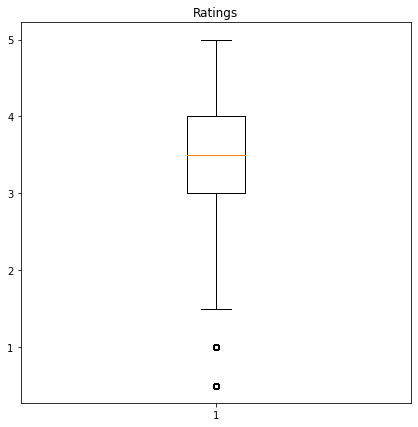

Comment: While there are a few movie with exceptionally low ratings, this is a subjective topic
 so we accept that some movies are going to have very low ratings.


In [43]:
# outliers
fig, axs = plt.subplots(figsize=(7,7))

axs.boxplot(movies.rating)
axs.set_title('Ratings')
plt.show()
print('Comment: While there are a few movie with exceptionally low ratings, this is a subjective topic\n so we accept that some movies are going to have very low ratings.')

---
<span style='color:blue'><b> c. Outliers? </b></span><br>
 
 * while there are a few movie with exceptionally low ratings, this is a subjective topic so we accept that some movies are going to have very low ratings.
 
<span style='color:blue'><b> d. Are those mistakes? </b> </span><br>
* There were mistakes in the items file, namely we found 7 tmdbId's that were incorrect and that prevented us from being able to pull genre data from the movie database, but since we weren't able to discover this until after we shaped the data and there were only 7 of them, we decided it was ok to just move forward without those pieces of information.


<span style='color:blue'><b> e. How do you deal with these problems? </b></span><br>
    * comments made in-line above

---

## <span style='color:blue'>Data Understanding [20 points total] </span> <br>
### <span style='color:blue'>Section 2: Vizualization [10 points] </span><br>
<span style='color:blue'>1. Visualize the any important attributes appropriately.</span><br>
<span style='color:blue'>2. Important: Provide an interpretation for any charts or graphs.</span>
---

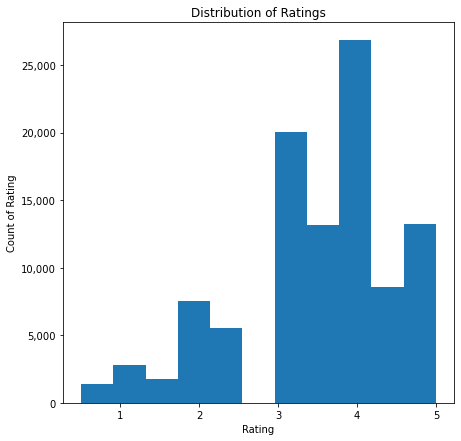

In [44]:
fig,ax = plt.subplots(figsize=(7,7))
ax.hist(ratings.rating, bins=11)
plt.xlabel('Rating')
plt.ylabel('Count of Rating')
plt.title('Distribution of Ratings')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()


###### Distribution Comments
Using the distribution of movie ratings we can see that most movies have either a 4 or a 3 rating and very few have a less than a 2 rating.

In [45]:
movies.columns

Index(['rating', 'tag', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'IMAX', 'Music', 'Mystery', 'Romance',
       'Sci-Fi', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

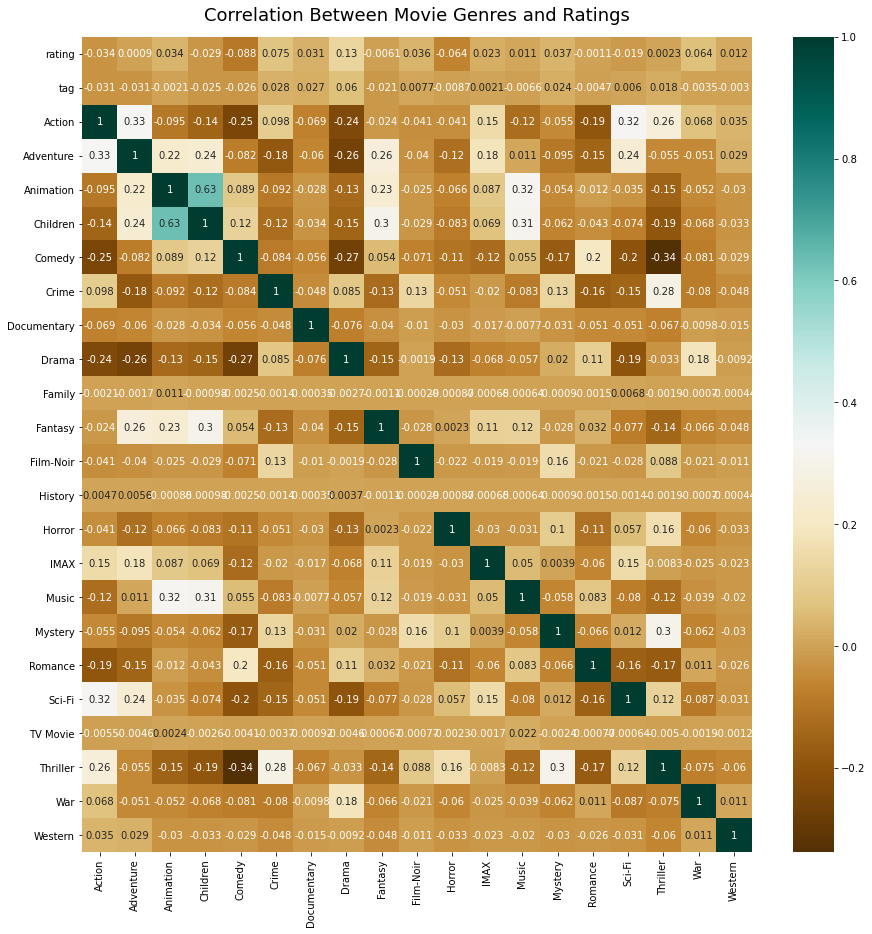

In [46]:
f, ax = plt.subplots(figsize=(15,15))
heatmap = sns.heatmap(movies.corr()[['Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Music', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']], annot=True, cmap='BrBG')
heatmap.set_title('Correlation Between Movie Genres and Ratings', fontdict={'fontsize':18}, pad=16);
plt.show()

##### Correlation Heatmap Comments
From the correlatioin heatmap we can see that the only 2 genres that are highly correlated are Animation and Chilren, something to keep in mind as we are mining for association rules.

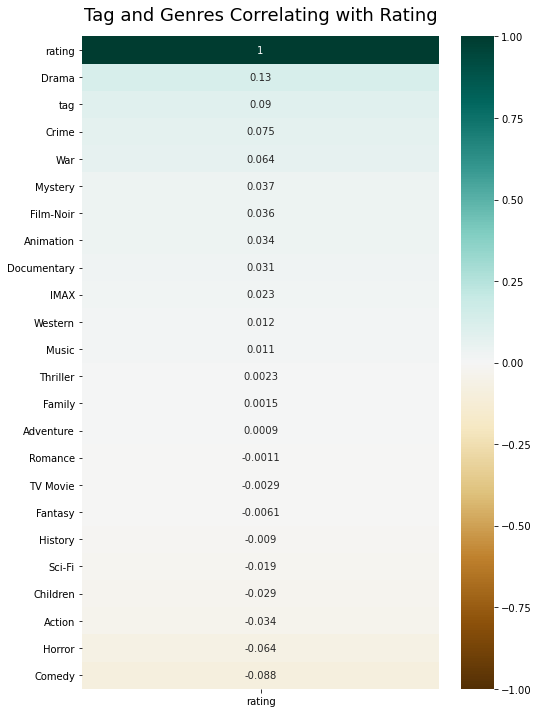

In [47]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(movies.corr()[['rating']].sort_values(by='rating', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Tag and Genres Correlating with Rating', fontdict={'fontsize':18}, pad=16);


##### Heatmap Comments
We see that Drama correlates the highest with rating, followed by Crime, War, Mystery, Film-Noir, Animation, Documentary, IMAX, Western, Musical, Thriller and Adventure while Romance, Fantasy, Sci-Fi, Children, Action, Horror and Comedy have negative correlation meaning that those genres tend to drive down a movie rating.
Since Adventure and Fantasy have such low correlation we consider they have very little impact on a movie's rating.

We can also see that having a tag isn't very highly correlated with a rating either.

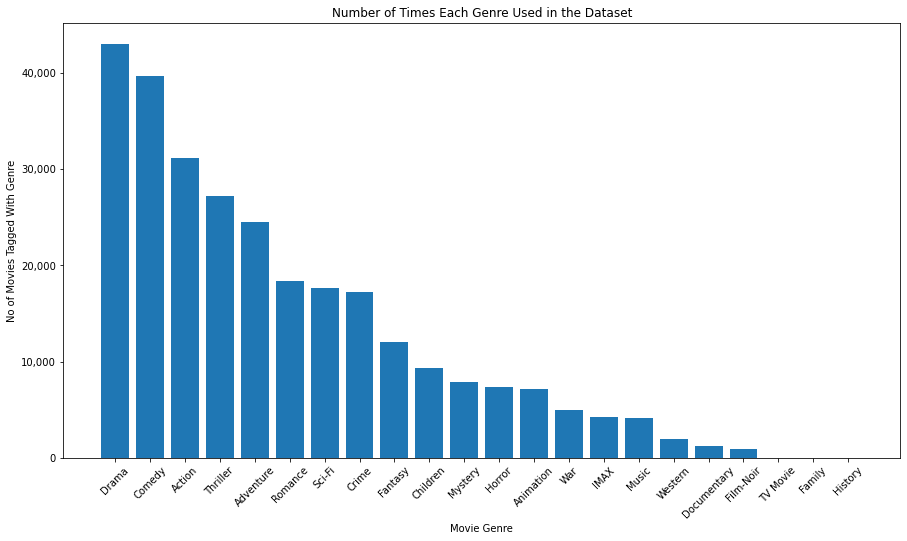

In [48]:
genre = ['Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
df = pd.DataFrame()
df['genre_tot'] = movies.iloc[:,2:24].sum(axis=0).astype('int')
df.reset_index(inplace=True)
df.rename(columns = {'index':'genre'}, inplace=True)
df.sort_values('genre_tot', ascending=False, inplace=True)

f, ax = plt.subplots(figsize=(15,8))
ax.bar(df.genre, df.genre_tot)
plt.xlabel('Movie Genre')
plt.xticks(rotation=45)
plt.ylabel('No of Movies Tagged With Genre')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Number of Times Each Genre Used in the Dataset')

plt.show()

###### Genre Usage Comments
Drama, Comedy, Action, Thriller and Adventure are the 5 most used genre titles in the dataset while Documentary, Film-Noir, TV Movie, Family and History are the least used. This will more than likely come into play when determining which rules are the most important since the anything that is used less should present an interesting observation if it shows up as being more important.

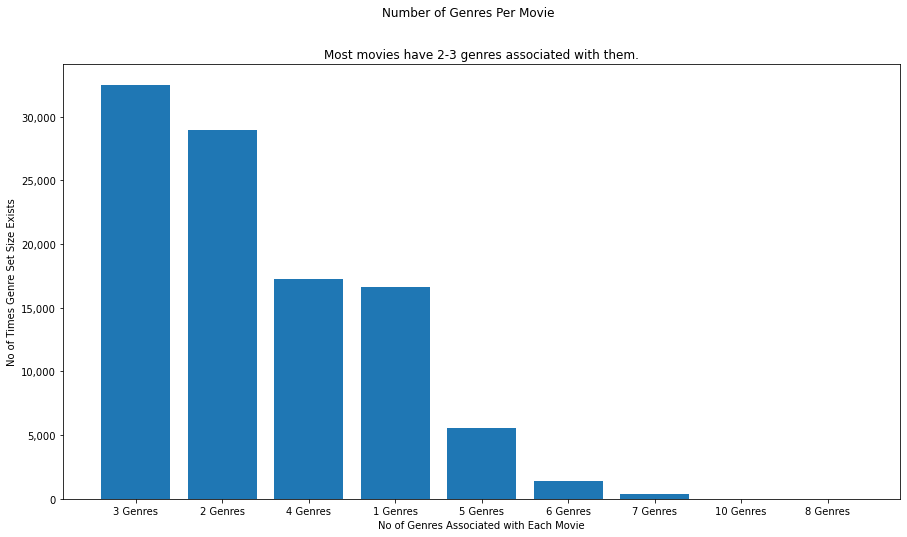

In [49]:
# let's get the combinations of genres by row to get a sense of what we should be looking for in the association rules mining
genre_combo = pd.DataFrame(movies.iloc[:,2:24].sum(axis=1).value_counts())
genre_combo.reset_index(inplace=True)
genre_combo.columns=['genre_combo','no_of_combos']
genre_combo.genre_combo = genre_combo.genre_combo.astype('str').str.slice(stop=-2) + ' Genres'
genre_combo.sort_values('no_of_combos', ascending=False, inplace=True)

f, ax = plt.subplots(figsize=(15,8))
ax.bar(genre_combo.genre_combo, genre_combo.no_of_combos)
plt.xlabel('No of Genres Associated with Each Movie')
plt.ylabel('No of Times Genre Set Size Exists')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.suptitle('Number of Genres Per Movie')
plt.title('Most movies have 2-3 genres associated with them.')

plt.show()
#print(genre_combo)
#print(movies.iloc[:,5:27].columns) making sure we captured all the movie genres

In [50]:
genre_combo

,genre_combo,no_of_combos
0,3 Genres,32517
1,2 Genres,28920
2,4 Genres,17250
3,1 Genres,16618
4,5 Genres,5579
5,6 Genres,1400
6,7 Genres,382
7,10 Genres,2
8,8 Genres,1


##### Genres by Movie
This should help us determine which association rules are important because we we can see most movies have 2-3 genres associated with them, further with the chart above we can expect those genres to be Drama, Comedy, Action, Thriller. If we get some different results that may be something interesting


In [51]:
movies.columns

Index(['rating', 'tag', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'IMAX', 'Music', 'Mystery', 'Romance',
       'Sci-Fi', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [52]:
# flatten out the movies df
movies.rating = movies.rating.astype('category')
movie_dum = pd.get_dummies(movies[['rating', 'tag']])

movies2=movies[['Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Music', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]
movies2 = movies2.join(movie_dum)
movies2

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,rating_0.5,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5.0
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
102673,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
102674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
102675,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
movies3 = copy.deepcopy(movies2).astype('bool')
movies3

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,rating_0.5,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5.0
0,False,True,True,True,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102672,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
102673,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
102674,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
102675,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


---
# <span style='color:blue'>Modeling & Evaluation [50 points total]</span>
Different tasks will require different evaluation methods. Be as thorough as possible when analyzing the data you have chosen and use visualizations of the results to explain the performance and expected outcomes whenever possible. Guide the reader through your analysis with plenty of discussion of the results. Each option is broken down by:


## <span style='color:blue'>M&E Section 1: Train & Adjust Parameters [10 points]</span>
---

In [54]:
# get rpy2 set up
from rpy2.robjects.packages import importr
from rpy2 import robjects as ro
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.conversion import localconverter
pandas2ri.activate()

# so we can write r code using %R
%load_ext rpy2.ipython
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\justi\.conda\envs\lab3\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(
C:\Users\justi\.conda\envs\lab3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [55]:
#%R install.packages('magrittr', dependencies=TRUE)
#%R install.packages('arulesViz', dpeendencies=TRUE)

In [56]:
%R .libPaths()

'C:/Users/justi/.conda/...,'C:/Program Files/R/R-4...


In [57]:
lib_loc = 'C:/Users/justi/.conda/envs/lab3/Lib/R/library'  # R library location

# import R packages
arules = importr('arules', lib_loc=lib_loc)
arules_viz = importr('arulesViz', lib_loc=lib_loc)

# get quality from itsets by using itsets.slots['quality']

In [58]:
with localconverter(ro.default_converter + pandas2ri.converter):
     rmovies = ro.conversion.py2rpy(movies3)

rmovies

Action,Adventure,Animation,...,rating_4.0,rating_4.5,rating_5.0
0,1,1,...,1,0,0
0,0,0,,1,0,0
1,0,0,,1,0,0
0,0,0,,0,0,1
...,...,...,,...,...,...
1,0,0,,0,0,1
0,0,0,,0,0,1
1,0,0,,0,0,1
1,0,0,,0,0,0


In [59]:
%R -i rmovies
# convert to transaction data
%R trans = as(rmovies, 'transactions')


<rpy2.robjects.methods.RS4 object at 0x0000020AD503BDC0> [RTYPES.S4SXP]
R classes: ('transactions',)

In [60]:
# create a list of parameters to test on the aprior algorithm
%R params = list(list(supp=0.001, minlen = 2,target='frequent itemsets'),list(supp=0.05, minlen = 2,target='frequent itemsets'),list(supp=0.1, minlen = 2,target='frequent itemsets'))

%R params[1]

[no name],[RTYPES.VECSXP]


##### <span style='color:green'>Find Frequent Itemsets</span>

- all using the defailt confidence = 0.8
- default parameters: support = 0.1, min conf = 0.8, maxlen = 10, maxtime = 5 seconds<br><br>



In [80]:
%R itsets1 = list(supp=0.01, minlen = 1, target='frequent itemsets')

%R itsets2 = list(supp=0.01, minlen = 2, target='frequent itemsets')

%R itsets3 = list(supp=0.01, minlen = 3, target='frequent itemsets')

supp,[RTYPES.REALSXP]
minlen,[RTYPES.REALSXP]
target,[RTYPES.STRSXP]


In [81]:
%R itsets1 <- apriori(trans, parameter = itsets1)

%R itsets1 = sort(itsets1, by='support'); writeLines('\n--- itsets1---\n'); inspect(head(itsets1, n=10))
%R print(length(itsets1))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen            target  ext
     10 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1026 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[30 item(s), 102669 transaction(s)] done [0.03s].
sorting and recoding items ... [29 item(s)] done [0.00s].
creating transaction tree ... done [0.04s].
checking subsets of size 1 2 3 4 5 done [0.01s].
sorting transactions ... done [0.02s].
writing ... [320 set(s)] done [0.00s].
creating S4 object  ... done [0.01s].

--- itsets1---

     items        support   transIdenticalToItemsets count
[1]  {Drama}      0.4192015 0.000000e+00             43039
[2]  {Comedy}     0.3860367 0.000000e+00             39634
[3]  {Action}     0.3035093

array([320], dtype=int32)

In [82]:
%R itsets2 <- apriori(trans, parameter = itsets2)

%R itsets2 = sort(itsets2, by='support'); writeLines('\n--- itsets2---\n'); inspect(head(itsets2, n=10))
%R print(length(itsets2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.01      2
 maxlen            target  ext
     10 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1026 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[30 item(s), 102669 transaction(s)] done [0.03s].
sorting and recoding items ... [29 item(s)] done [0.01s].
creating transaction tree ... done [0.04s].
checking subsets of size 1 2 3 4 5 done [0.01s].
sorting transactions ... done [0.02s].
writing ... [291 set(s)] done [0.00s].
creating S4 object  ... done [0.01s].

--- itsets2---

     items               support    transIdenticalToItemsets count
[1]  {Action,Adventure}  0.13653586 0.00000000               14018
[2]  {Action,Thriller}   0.13225024 0.00000000               13578
[3]

array([291], dtype=int32)

In [83]:
%R itsets3 <- apriori(trans, parameter = itsets3)

%R itsets3 = sort(itsets3, by='support'); writeLines('\n--- itsets3---\n'); inspect(head(itsets3, n=10))
%R print(length(itsets3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.01      3
 maxlen            target  ext
     10 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1026 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[30 item(s), 102669 transaction(s)] done [0.03s].
sorting and recoding items ... [29 item(s)] done [0.01s].
creating transaction tree ... done [0.03s].
checking subsets of size 1 2 3 4 5 done [0.00s].
sorting transactions ... done [0.02s].
writing ... [142 set(s)] done [0.00s].
creating S4 object  ... done [0.01s].

--- itsets3---

     items                          support    transIdenticalToItemsets count
[1]  {Action,Adventure,Sci-Fi}      0.05958955 0.000000000              6118 
[2]  {Action,Adventure,Thriller}    0.04878785 0

array([142], dtype=int32)

##### get maximals

In [93]:
# get maximals

print('\n-------------- max1 -------------\n')
%R is_max1 <- itsets1[is.maximal(itsets1)]; inspect(head(sort(is_max1, by='support')))

print('\n-------------- max2 -------------\n')
%R is_max2 <- itsets2[is.maximal(itsets2)]; inspect(head(sort(is_max2, by='support')))

print('\n-------------- max3 -------------\n')
%R is_max3 <- itsets3[is.maximal(itsets3)]; inspect(head(sort(is_max3, by='support')))




-------------- max1 -------------

    items                      support    transIdenticalToItemsets count
[1] {Horror,Thriller}          0.03737253 0.000000000              3837 
[2] {Comedy,rating_2.0}        0.03321353 0.007850471              3410 
[3] {Comedy,rating_4.5}        0.02777859 0.003827835              2852 
[4] {Action,Adventure,Comedy}  0.02690199 0.000000000              2762 
[5] {Comedy,rating_2.5}        0.02471048 0.004996640              2537 
[6] {Action,Adventure,Fantasy} 0.02387283 0.000000000              2451 

-------------- max2 -------------

    items                      support    transIdenticalToItemsets count
[1] {Horror,Thriller}          0.03737253 0.000000000              3837 
[2] {Comedy,rating_2.0}        0.03321353 0.007850471              3410 
[3] {Comedy,rating_4.5}        0.02777859 0.003827835              2852 
[4] {Action,Adventure,Comedy}  0.02690199 0.000000000              2762 
[5] {Comedy,rating_2.5}        0.02471048 0.00499664

,items,support,transIdenticalToItemsets,count
[1],"{Action,Adventure,Comedy}",0.026902,0.000000,2762
[2],"{Action,Adventure,Fantasy}",0.023873,0.000000,2451
[3],"{Drama,Mystery,Thriller}",0.023532,0.000000,2416
[4],"{Comedy,Romance,rating_3.0}",0.022568,0.009234,2317
[5],"{Crime,Mystery,Thriller}",0.020756,0.000000,2131
[6],"{Action,Adventure,Sci-Fi,Thriller}",0.019782,0.000000,2031


In [273]:
print('-----------Recaps1-----------')
print('itsets1: list(supp=0.01, minlen = 1, target=\'frequent itemsets\')\n')
%R print('itemsets: ');print(length(itsets1)); print('maximals: '); print(length(is_max1))

print('-----------Recaps2-----------')
print('itsets2: list(supp=0.01, minlen = 2, target=\'frequent itemsets\')\n')
%R print('itemsets: ');print(length(itsets2)); print('maximals: '); print(length(is_max2))

print('-----------Recaps3-----------')
print('itsets3: list(supp=0.001, minlen = 3, target=\'frequent itemsets\')\n')
%R print('itemsets: ');print(length(itsets3)); print('maximals: '); print(length(is_max3))



-----------Recaps1-----------
itsets1: list(supp=0.01, minlen = 1, target='frequent itemsets')

[1] "itemsets: "
[1] 320
[1] "maximals: "
[1] 152
-----------Recaps2-----------
itsets2: list(supp=0.01, minlen = 2, target='frequent itemsets')

[1] "itemsets: "
[1] 291
[1] "maximals: "
[1] 148
-----------Recaps3-----------
itsets3: list(supp=0.001, minlen = 3, target='frequent itemsets')

[1] "itemsets: "
[1] 142
[1] "maximals: "
[1] 94


array([94], dtype=int32)

#### Comments on Maximals
Itemsets with minlen = 2 are interesting because then we are able to parse out specific instances where say we want to see how a genre does when the itemset includes a rating as opposed to just getting either a genre or a rating instance back, this way there at least has to be 2 items in an item set and we can subset results a based on what we want to see as the rhs values.

Also it is interesting that the minlen=1 and minlen=2 are have identical top 5 maximal itemsets and nearly the same number of maximals (1:152 vs 2:148) when compared to minlen=3 where there are 94 maximals.

for rules mining, I feel like minlen=2 will be sufficient

##### Mine Association Rules

- remember the default confidence = 0.8
- default parameters: support = 0.1, min conf = 0.8, maxlen = 10, maxtime = 5 seconds<br><br>

In [108]:

#print('\n-----------Rule Mining rule2-----------\n')

%R rules2_8 = apriori(trans, parameter = list(supp=0.01, minlen = 2, conf = 0.8))
%R inspect(head(rules2_8, n=10))
#print quality metrics
%R quality(head(rules2_8))
# no rule!

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.01      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1026 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[30 item(s), 102669 transaction(s)] done [0.03s].
sorting and recoding items ... [29 item(s)] done [0.00s].
creating transaction tree ... done [0.04s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [20 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].
     lhs                       rhs        support    confidence coverage  
[1]  {War}                  => {Drama}    0.03958352 0.8238394  0.04804761
[2]  {War,rating_4.0}       => {Drama}    0.01207765 0.8498972  0.01421072
[3]  {Animation,Music}      => {Children} 0.01654833 0.88

,support,confidence,coverage,lift,count
1,0.039584,0.823839,0.048048,1.965259,4064
2,0.012078,0.849897,0.014211,2.027419,1240
3,0.016548,0.880767,0.018789,9.739094,1699
4,0.010042,0.815665,0.012311,9.019221,1031
5,0.016568,0.889644,0.018623,2.931193,1701
6,0.020756,0.804758,0.025792,3.039984,2131


In [110]:
print('\n----------- rules2, sort by \'lift\'-----------\n')
%R rules2_8 = sort(rules2_8, by='lift')
%R inspect(head(rules2_8, n=10))
%R interestMeasure(rules2[1:10], trans=trans)



----------- rules2, sort by 'lift'-----------

     lhs                                     rhs         support    confidence
[1]  {Adventure,Animation,Comedy,Fantasy} => {Children}  0.01071404 0.9329941 
[2]  {Adventure,Animation,Comedy}         => {Children}  0.02288909 0.9021113 
[3]  {Animation,Music}                    => {Children}  0.01654833 0.8807672 
[4]  {Animation,Comedy,Fantasy}           => {Children}  0.01132766 0.8482859 
[5]  {Adventure,Animation,rating_4.0}     => {Children}  0.01012964 0.8340016 
[6]  {Adventure,Animation}                => {Children}  0.03377845 0.8302610 
[7]  {Animation,rating_3.0}               => {Children}  0.01029522 0.8187452 
[8]  {Fantasy,Music}                      => {Children}  0.01004198 0.8156646 
[9]  {Animation,Children,Comedy,Fantasy}  => {Adventure} 0.01071404 0.9458298 
[10] {Animation,Comedy,Fantasy}           => {Adventure} 0.01148351 0.8599562 
     coverage   lift      count
[1]  0.01148351 10.316593 1100 
[2]  0.02537280  9.

,support,confidence,lift,count,coverage,rhsSupport,leverage,hyperLift,hyperConfidence,fishersExactTest,...,leastContradiction,centeredConfidence,varyingLiaison,yuleQ,yuleY,lerman,implicationIndex,importance,stdLift,boost
1,0.010714,0.932994,10.316593,1100,0.011484,0.090436,0.009676,8.461538,1.0,0.0,...,0.118471,0.842558,9.316593,0.987479,0.852927,96.202270,-30.334723,1.062897,0.481321,1.034234
2,0.022889,0.902111,9.975107,2350,0.025373,0.090436,0.020594,8.703704,1.0,0.0,...,0.253096,0.811675,8.975107,0.983969,0.835046,137.757351,-43.437968,1.114289,0.510557,1.086540
3,0.016548,0.880767,9.739094,1699,0.018789,0.090436,0.014849,8.328431,1.0,0.0,...,0.182983,0.790331,8.739094,0.978192,0.809961,115.426050,-36.396410,1.067807,0.403836,inf
4,0.011328,0.848286,9.379932,1163,0.013354,0.090436,0.010120,7.805369,1.0,0.0,...,0.125256,0.757850,8.379932,0.969299,0.778000,93.310497,-29.422883,1.024175,0.241430,inf
5,0.010130,0.834002,9.221983,1040,0.012146,0.090436,0.009031,7.591241,1.0,0.0,...,0.112009,0.743565,8.221983,0.965385,0.765674,87.313436,-27.531876,1.010786,0.060415,1.004505
6,0.033778,0.830261,9.180621,3468,0.040684,0.090436,0.030099,8.237530,1.0,0.0,...,0.373506,0.739825,8.180621,0.974661,0.796494,158.997309,-50.135401,1.147768,0.151305,inf
7,0.010295,0.818745,9.053285,1057,0.012574,0.090436,0.009158,7.496454,1.0,0.0,...,0.113840,0.728309,8.053285,0.961641,0.754635,87.017670,-27.438614,1.003492,0.093726,inf
8,0.010042,0.815665,9.019221,1031,0.012311,0.090436,0.008929,7.471014,1.0,0.0,...,0.111039,0.725228,8.019221,0.960736,0.752065,85.738719,-27.035332,1.000597,0.018162,inf
9,0.010714,0.945830,3.962758,1100,0.011328,0.238680,0.008010,3.525641,1.0,0.0,...,0.044889,0.707150,2.962758,0.966253,0.768333,49.362118,-27.638709,0.612634,0.537818,1.099858
10,0.011484,0.859956,3.602973,1179,0.013354,0.238680,0.008296,3.239011,1.0,0.0,...,0.048113,0.621277,2.602973,0.907090,0.638375,47.086459,-26.364528,0.571962,0.299781,inf


###### minlen = 3, conf = 0.8

In [303]:
print('\n-----------Rule Mining rule3-----------\n')
%R rules3_8 = apriori(trans, parameter = list(supp=0.01, minlen = 3, conf = 0.8))
%R inspect(head(rules3_8, n=10))
#print quality metrics
%R print(quality(head(rules3_8)))




-----------Rule Mining rule3-----------

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.01      3
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1026 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[30 item(s), 102669 transaction(s)] done [0.03s].
sorting and recoding items ... [29 item(s)] done [0.00s].
creating transaction tree ... done [0.03s].
checking subsets of size 1 2 3 4 5 done [0.01s].
writing ... [19 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].
     lhs                        rhs        support    confidence coverage  
[1]  {War,rating_4.0}        => {Drama}    0.01207765 0.8498972  0.01421072
[2]  {Animation,Music}       => {Children} 0.01654833 0.8807672  0.01878853
[3]  {Fantas

,support,confidence,coverage,lift,count
1,0.012078,0.849897,0.014211,2.027419,1240
2,0.016548,0.880767,0.018789,9.739094,1699
3,0.010042,0.815665,0.012311,9.019221,1031
4,0.016568,0.889644,0.018623,2.931193,1701
5,0.020756,0.804758,0.025792,3.039984,2131
6,0.011805,0.814516,0.014493,3.076844,1212


In [304]:
print('\n----------- rules3, sort by \'lift\'-----------\n')
%R rules3_8 = sort(rules3_8, by='lift')
%R inspect(head(rules3_8, n=10))
%R interestMeasure(rules3[1:10], trans=trans)


----------- rules3, sort by 'lift'-----------

     lhs                                     rhs         support    confidence
[1]  {Adventure,Animation,Comedy,Fantasy} => {Children}  0.01071404 0.9329941 
[2]  {Adventure,Animation,Comedy}         => {Children}  0.02288909 0.9021113 
[3]  {Animation,Music}                    => {Children}  0.01654833 0.8807672 
[4]  {Animation,Comedy,Fantasy}           => {Children}  0.01132766 0.8482859 
[5]  {Adventure,Animation,rating_4.0}     => {Children}  0.01012964 0.8340016 
[6]  {Adventure,Animation}                => {Children}  0.03377845 0.8302610 
[7]  {Animation,rating_3.0}               => {Children}  0.01029522 0.8187452 
[8]  {Fantasy,Music}                      => {Children}  0.01004198 0.8156646 
[9]  {Animation,Children,Comedy,Fantasy}  => {Adventure} 0.01071404 0.9458298 
[10] {Animation,Comedy,Fantasy}           => {Adventure} 0.01148351 0.8599562 
     coverage   lift      count
[1]  0.01148351 10.316593 1100 
[2]  0.02537280  9.

,support,confidence,lift,count,coverage,rhsSupport,leverage,hyperLift,hyperConfidence,fishersExactTest,...,leastContradiction,centeredConfidence,varyingLiaison,yuleQ,yuleY,lerman,implicationIndex,importance,stdLift,boost
1,0.010714,0.932994,10.316593,1100,0.011484,0.090436,0.009676,8.461538,1.0,0.0,...,0.118471,0.842558,9.316593,0.987479,0.852927,96.202270,-30.334723,1.062897,0.481321,1.034234
2,0.022889,0.902111,9.975107,2350,0.025373,0.090436,0.020594,8.703704,1.0,0.0,...,0.253096,0.811675,8.975107,0.983969,0.835046,137.757351,-43.437968,1.114289,0.510557,1.086540
3,0.016548,0.880767,9.739094,1699,0.018789,0.090436,0.014849,8.328431,1.0,0.0,...,0.182983,0.790331,8.739094,0.978192,0.809961,115.426050,-36.396410,1.067807,0.403836,inf
4,0.011328,0.848286,9.379932,1163,0.013354,0.090436,0.010120,7.805369,1.0,0.0,...,0.125256,0.757850,8.379932,0.969299,0.778000,93.310497,-29.422883,1.024175,0.241430,inf
5,0.010130,0.834002,9.221983,1040,0.012146,0.090436,0.009031,7.591241,1.0,0.0,...,0.112009,0.743565,8.221983,0.965385,0.765674,87.313436,-27.531876,1.010786,0.060415,1.004505
6,0.033778,0.830261,9.180621,3468,0.040684,0.090436,0.030099,8.237530,1.0,0.0,...,0.373506,0.739825,8.180621,0.974661,0.796494,158.997309,-50.135401,1.147768,0.151305,inf
7,0.010295,0.818745,9.053285,1057,0.012574,0.090436,0.009158,7.496454,1.0,0.0,...,0.113840,0.728309,8.053285,0.961641,0.754635,87.017670,-27.438614,1.003492,0.093726,inf
8,0.010042,0.815665,9.019221,1031,0.012311,0.090436,0.008929,7.471014,1.0,0.0,...,0.111039,0.725228,8.019221,0.960736,0.752065,85.738719,-27.035332,1.000597,0.018162,inf
9,0.010714,0.945830,3.962758,1100,0.011328,0.238680,0.008010,3.525641,1.0,0.0,...,0.044889,0.707150,2.962758,0.966253,0.768333,49.362118,-27.638709,0.612634,0.537818,1.099858
10,0.011484,0.859956,3.602973,1179,0.013354,0.238680,0.008296,3.239011,1.0,0.0,...,0.048113,0.621277,2.602973,0.907090,0.638375,47.086459,-26.364528,0.571962,0.299781,inf


###### minlen = 3, conf = 0.9

In [112]:
print('\n-----------Rule Mining rule3-----------\n')
%R rules3_9 = apriori(trans, parameter = list(supp=0.01, minlen = 3, conf = 0.9))
%R inspect(head(rules3_9, n=10))
#print quality metrics
%R print(quality(head(rules3_9)))


-----------Rule Mining rule3-----------

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5    0.01      3
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1026 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[30 item(s), 102669 transaction(s)] done [0.03s].
sorting and recoding items ... [29 item(s)] done [0.00s].
creating transaction tree ... done [0.03s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [8 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].
    lhs                                     rhs         support    confidence
[1] {Adventure,Thriller}                 => {Action}    0.04878785 0.9228077 
[2] {Adventure,IMAX,Sci-Fi}              => {Action}    0.01004198 0.9519852 
[3] {Ad

,support,confidence,coverage,lift,count
1,0.048788,0.922808,0.052869,3.040459,5009
2,0.010042,0.951985,0.010548,3.136593,1031
3,0.022889,0.902111,0.025373,9.975107,2350
4,0.011591,0.942201,0.012302,3.104356,1190
5,0.019782,0.937240,0.021107,3.088012,2031
6,0.013091,0.914286,0.014318,3.012381,1344


In [113]:
print('\n----------- rules3 with conf=.9, sort by \'lift\'-----------\n')
%R rules3_9 = sort(rules3_9, by='lift')
%R inspect(head(rules3_9, n=10))
%R interestMeasure(rules3[1:10], trans=trans)


----------- rules3 with conf=.9, sort by 'lift'-----------

    lhs                                     rhs         support    confidence
[1] {Adventure,Animation,Comedy,Fantasy} => {Children}  0.01071404 0.9329941 
[2] {Adventure,Animation,Comedy}         => {Children}  0.02288909 0.9021113 
[3] {Animation,Children,Comedy,Fantasy}  => {Adventure} 0.01071404 0.9458298 
[4] {Adventure,IMAX,Sci-Fi}              => {Action}    0.01004198 0.9519852 
[5] {Adventure,Thriller,rating_3.0}      => {Action}    0.01159065 0.9422011 
[6] {Adventure,Sci-Fi,Thriller}          => {Action}    0.01978202 0.9372404 
[7] {Adventure,Thriller}                 => {Action}    0.04878785 0.9228077 
[8] {Adventure,Thriller,rating_4.0}      => {Action}    0.01309061 0.9142857 
    coverage   lift      count
[1] 0.01148351 10.316593 1100 
[2] 0.02537280  9.975107 2350 
[3] 0.01132766  3.962758 1100 
[4] 0.01054846  3.136593 1031 
[5] 0.01230167  3.104356 1190 
[6] 0.02110666  3.088012 2031 
[7] 0.05286893  3.04

,support,confidence,lift,count,coverage,rhsSupport,leverage,hyperLift,hyperConfidence,fishersExactTest,...,leastContradiction,centeredConfidence,varyingLiaison,yuleQ,yuleY,lerman,implicationIndex,importance,stdLift,boost
1,0.010714,0.932994,10.316593,1100,0.011484,0.090436,0.009676,8.461538,1.0,0.0,...,0.118471,0.842558,9.316593,0.987479,0.852927,96.202270,-30.334723,1.062897,0.481321,1.034234
2,0.022889,0.902111,9.975107,2350,0.025373,0.090436,0.020594,8.703704,1.0,0.0,...,0.253096,0.811675,8.975107,0.983969,0.835046,137.757351,-43.437968,1.114289,0.510557,1.086540
3,0.016548,0.880767,9.739094,1699,0.018789,0.090436,0.014849,8.328431,1.0,0.0,...,0.182983,0.790331,8.739094,0.978192,0.809961,115.426050,-36.396410,1.067807,0.403836,inf
4,0.011328,0.848286,9.379932,1163,0.013354,0.090436,0.010120,7.805369,1.0,0.0,...,0.125256,0.757850,8.379932,0.969299,0.778000,93.310497,-29.422883,1.024175,0.241430,inf
5,0.010130,0.834002,9.221983,1040,0.012146,0.090436,0.009031,7.591241,1.0,0.0,...,0.112009,0.743565,8.221983,0.965385,0.765674,87.313436,-27.531876,1.010786,0.060415,1.004505
6,0.033778,0.830261,9.180621,3468,0.040684,0.090436,0.030099,8.237530,1.0,0.0,...,0.373506,0.739825,8.180621,0.974661,0.796494,158.997309,-50.135401,1.147768,0.151305,inf
7,0.010295,0.818745,9.053285,1057,0.012574,0.090436,0.009158,7.496454,1.0,0.0,...,0.113840,0.728309,8.053285,0.961641,0.754635,87.017670,-27.438614,1.003492,0.093726,inf
8,0.010042,0.815665,9.019221,1031,0.012311,0.090436,0.008929,7.471014,1.0,0.0,...,0.111039,0.725228,8.019221,0.960736,0.752065,85.738719,-27.035332,1.000597,0.018162,inf
9,0.010714,0.945830,3.962758,1100,0.011328,0.238680,0.008010,3.525641,1.0,0.0,...,0.044889,0.707150,2.962758,0.966253,0.768333,49.362118,-27.638709,0.612634,0.537818,1.099858
10,0.011484,0.859956,3.602973,1179,0.013354,0.238680,0.008296,3.239011,1.0,0.0,...,0.048113,0.621277,2.602973,0.907090,0.638375,47.086459,-26.364528,0.571962,0.299781,inf


---
## <span style='color:blue'> M&E Section 2: Evaluate & Compare [10 points]</span>
- <span style='color:blue'><b>Evaluate:</b> Use correct method for the model: Support, Confidence, Lift</span><br>
    
---

In [305]:
# let's get the means for support confidence and lift from our rules
%R r2_support <- mean(quality(rules2_8)$support)
%R r2_conf <- mean(quality(rules2_8)$confidence)
%R r2_lift <- mean(quality(rules2_8)$lift)
%R r2_count <- mean(quality(rules2_8)[['count']])

%R r38_support <- mean(quality(rules3_8)$support)
%R r38_conf <- mean(quality(rules3_8)$confidence)
%R r38_lift <- mean(quality(rules3_8)$lift)
%R r38_count <- mean(quality(rules3_8)[['count']])

%R r39_support <- mean(quality(rules3_9)$support)
%R r39_conf <- mean(quality(rules3_9)$confidence)
%R r39_lift <- mean(quality(rules3_9)$lift)
%R r39_count <- mean(quality(rules3_9)[['count']])

%R x = noquote(' ')

%R print(noquote('rules 2 with supp=0.01, minlen=2, conf = 0.8'))
%R print(noquote(paste('avg supp:', r2_support)))
%R print(noquote(paste('avg conf:', r2_conf)))
%R print(noquote(paste('avg lift:',r2_lift)))
%R print(noquote(paste('avg count:',r2_count)))
%R print(x)
%R print(noquote('rules 3_8 with supp=0.01, minlen=3, conf = 0.8'))
%R print(noquote(paste('avg supp:', r38_support)))
%R print(noquote(paste('avg conf:', r38_conf)))
%R print(noquote(paste('avg lift:',r38_lift)))
%R print(noquote(paste('avg count:',r38_count)))
%R print(x)
%R print(noquote('rules 3_9 with supp=0.01, minlen=3, conf = 0.9'))
%R print(noquote(paste('avg supp:', r39_support)))
%R print(noquote(paste('avg conf:', r39_conf)))
%R print(noquote(paste('avg lift:',r39_lift)))
%R print(noquote(paste('avg count:',r39_count)))


[1] rules 2 with supp=0.01, minlen=2, conf = 0.8
[1] avg supp: 0.0176002493449824
[1] avg conf: 0.875989618538067
[1] avg lift: 5.59370331088501
[1] avg count: 1807
[1]  
[1] rules 3_8 with supp=0.01, minlen=3, conf = 0.8
[1] avg supp: 0.0164432353126629
[1] avg conf: 0.878734364323682
[1] avg lift: 5.78467407601443
[1] avg count: 1688.21052631579
[1]  
[1] rules 3_9 with supp=0.01, minlen=3, conf = 0.9
[1] avg supp: 0.0184512851980637
[1] avg conf: 0.931181909410237
[1] avg lift: 4.95453240408426
[1] avg count: 1894.375


'avg count: 1894.375'


##### Comments on Different Quality Metrics from 3 Rules Runs
1. We see that as the parameters increase, the rules decrease and the metrics for support and confidence increase as lift decreases. This is more a result of a shrinking of the pool of available rules as we force more attributes into fewer groups where support is the frequency of an itemset appearing (more items per itemsets means less overall itemsets with the same number of transactions, thus morn itemsets and that is noted in the average or mean counts.
2. Confidence is also increasing, and high confidence coupled with low support means that the rules may not have occurred frequently in the itemsets, but through analysis the rule appears more frequently, making it more interestering<br>
[John] Confidence tells us that what you have on the rhs will go with what you have on khs<br>
3. Lift is the ratio of confidence to support we see lift decrease as the tighten the parameters on the rules going from minlen 2 to 3 and then confidence from .8 to .9.

Using Lift between the 3 rules groups, these are the top 5 rules in each group with their lift scores
- minlen = 2, conf = 0.8, supp = 0.0

In [306]:
%R inspect(rules2)

     lhs                                     rhs         support    confidence
[1]  {Adventure,Animation,Comedy,Fantasy} => {Children}  0.01071404 0.9329941 
[2]  {Adventure,Animation,Comedy}         => {Children}  0.02288909 0.9021113 
[3]  {Animation,Music}                    => {Children}  0.01654833 0.8807672 
[4]  {Animation,Comedy,Fantasy}           => {Children}  0.01132766 0.8482859 
[5]  {Adventure,Animation,rating_4.0}     => {Children}  0.01012964 0.8340016 
[6]  {Adventure,Animation}                => {Children}  0.03377845 0.8302610 
[7]  {Animation,rating_3.0}               => {Children}  0.01029522 0.8187452 
[8]  {Fantasy,Music}                      => {Children}  0.01004198 0.8156646 
[9]  {Animation,Children,Comedy,Fantasy}  => {Adventure} 0.01071404 0.9458298 
[10] {Animation,Comedy,Fantasy}           => {Adventure} 0.01148351 0.8599562 
[11] {Adventure,IMAX,Sci-Fi}              => {Action}    0.01004198 0.9519852 
[12] {Adventure,Thriller,rating_3.0}      => {Action

,lhs,,rhs,support,confidence,coverage,lift,count
[1],"{Adventure,Animation,Comedy,Fantasy}",=>,{Children},0.010714,0.932994,0.011484,10.316593,1100
[2],"{Adventure,Animation,Comedy}",=>,{Children},0.022889,0.902111,0.025373,9.975107,2350
[3],"{Animation,Music}",=>,{Children},0.016548,0.880767,0.018789,9.739094,1699
[4],"{Animation,Comedy,Fantasy}",=>,{Children},0.011328,0.848286,0.013354,9.379932,1163
[5],"{Adventure,Animation,rating_4.0}",=>,{Children},0.010130,0.834002,0.012146,9.221983,1040
[6],"{Adventure,Animation}",=>,{Children},0.033778,0.830261,0.040684,9.180621,3468
[7],"{Animation,rating_3.0}",=>,{Children},0.010295,0.818745,0.012574,9.053285,1057
[8],"{Fantasy,Music}",=>,{Children},0.010042,0.815665,0.012311,9.019221,1031
[9],"{Animation,Children,Comedy,Fantasy}",=>,{Adventure},0.010714,0.945830,0.011328,3.962758,1100
[10],"{Animation,Comedy,Fantasy}",=>,{Adventure},0.011484,0.859956,0.013354,3.602973,1179


In [307]:
%R inspect(rules3_8)

     lhs                                     rhs         support    confidence
[1]  {Adventure,Animation,Comedy,Fantasy} => {Children}  0.01071404 0.9329941 
[2]  {Adventure,Animation,Comedy}         => {Children}  0.02288909 0.9021113 
[3]  {Animation,Music}                    => {Children}  0.01654833 0.8807672 
[4]  {Animation,Comedy,Fantasy}           => {Children}  0.01132766 0.8482859 
[5]  {Adventure,Animation,rating_4.0}     => {Children}  0.01012964 0.8340016 
[6]  {Adventure,Animation}                => {Children}  0.03377845 0.8302610 
[7]  {Animation,rating_3.0}               => {Children}  0.01029522 0.8187452 
[8]  {Fantasy,Music}                      => {Children}  0.01004198 0.8156646 
[9]  {Animation,Children,Comedy,Fantasy}  => {Adventure} 0.01071404 0.9458298 
[10] {Animation,Comedy,Fantasy}           => {Adventure} 0.01148351 0.8599562 
[11] {Adventure,IMAX,Sci-Fi}              => {Action}    0.01004198 0.9519852 
[12] {Adventure,Thriller,rating_3.0}      => {Action

,lhs,,rhs,support,confidence,coverage,lift,count
[1],"{Adventure,Animation,Comedy,Fantasy}",=>,{Children},0.010714,0.932994,0.011484,10.316593,1100
[2],"{Adventure,Animation,Comedy}",=>,{Children},0.022889,0.902111,0.025373,9.975107,2350
[3],"{Animation,Music}",=>,{Children},0.016548,0.880767,0.018789,9.739094,1699
[4],"{Animation,Comedy,Fantasy}",=>,{Children},0.011328,0.848286,0.013354,9.379932,1163
[5],"{Adventure,Animation,rating_4.0}",=>,{Children},0.010130,0.834002,0.012146,9.221983,1040
[6],"{Adventure,Animation}",=>,{Children},0.033778,0.830261,0.040684,9.180621,3468
[7],"{Animation,rating_3.0}",=>,{Children},0.010295,0.818745,0.012574,9.053285,1057
[8],"{Fantasy,Music}",=>,{Children},0.010042,0.815665,0.012311,9.019221,1031
[9],"{Animation,Children,Comedy,Fantasy}",=>,{Adventure},0.010714,0.945830,0.011328,3.962758,1100
[10],"{Animation,Comedy,Fantasy}",=>,{Adventure},0.011484,0.859956,0.013354,3.602973,1179


In [300]:
%R inspect(rules3_9)

    lhs                                     rhs         support    confidence
[1] {Adventure,Animation,Comedy,Fantasy} => {Children}  0.01071404 0.9329941 
[2] {Adventure,Animation,Comedy}         => {Children}  0.02288909 0.9021113 
[3] {Animation,Children,Comedy,Fantasy}  => {Adventure} 0.01071404 0.9458298 
[4] {Adventure,IMAX,Sci-Fi}              => {Action}    0.01004198 0.9519852 
[5] {Adventure,Thriller,rating_3.0}      => {Action}    0.01159065 0.9422011 
[6] {Adventure,Sci-Fi,Thriller}          => {Action}    0.01978202 0.9372404 
[7] {Adventure,Thriller}                 => {Action}    0.04878785 0.9228077 
[8] {Adventure,Thriller,rating_4.0}      => {Action}    0.01309061 0.9142857 
    coverage   lift      count
[1] 0.01148351 10.316593 1100 
[2] 0.02537280  9.975107 2350 
[3] 0.01132766  3.962758 1100 
[4] 0.01054846  3.136593 1031 
[5] 0.01230167  3.104356 1190 
[6] 0.02110666  3.088012 2031 
[7] 0.05286893  3.040459 5009 
[8] 0.01431786  3.012381 1344 


,lhs,,rhs,support,confidence,coverage,lift,count
[1],"{Adventure,Animation,Comedy,Fantasy}",=>,{Children},0.010714,0.932994,0.011484,10.316593,1100
[2],"{Adventure,Animation,Comedy}",=>,{Children},0.022889,0.902111,0.025373,9.975107,2350
[3],"{Animation,Children,Comedy,Fantasy}",=>,{Adventure},0.010714,0.945830,0.011328,3.962758,1100
[4],"{Adventure,IMAX,Sci-Fi}",=>,{Action},0.010042,0.951985,0.010548,3.136593,1031
[5],"{Adventure,Thriller,rating_3.0}",=>,{Action},0.011591,0.942201,0.012302,3.104356,1190
[6],"{Adventure,Sci-Fi,Thriller}",=>,{Action},0.019782,0.937240,0.021107,3.088012,2031
[7],"{Adventure,Thriller}",=>,{Action},0.048788,0.922808,0.052869,3.040459,5009
[8],"{Adventure,Thriller,rating_4.0}",=>,{Action},0.013091,0.914286,0.014318,3.012381,1344


- <span style='color:blue'><b>Compare:</b> Use statistical analysis that can be found at the bottom of Week 6 IPYNB</span>


---
## <span style='color:blue'>M&E Section 3: Visualize Results [10 points]</span>


---

In [ ]:
%R library(arulesViz)

Graph for rules2


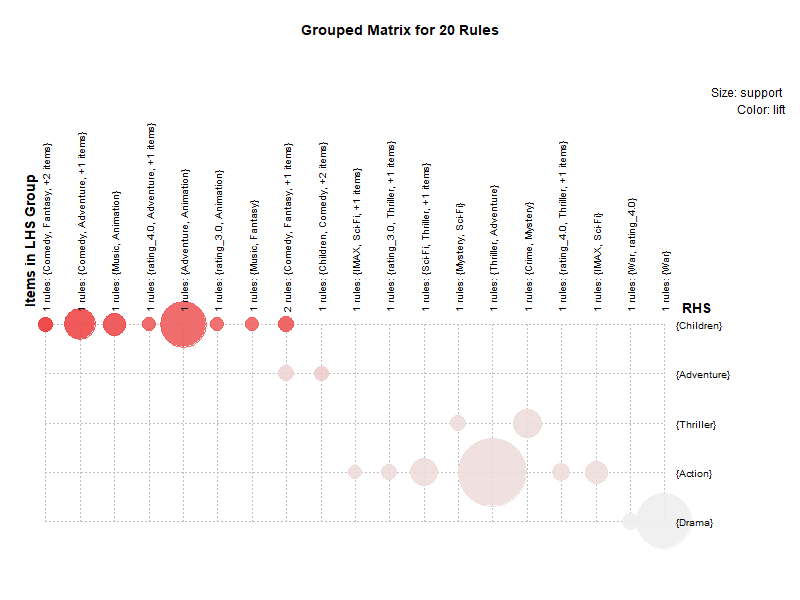

<rpy2.robjects.vectors.ListVector object at 0x0000020AC6F17D00> [RTYPES.VECSXP]
R classes: ('grouped_matrix',)
[SexpS4, StrSexpVe..., StrSexpVe..., FloatSexp..., ..., FloatSexp..., FloatSexp..., FloatSexp..., IntSexpVe...]
  rules: <class 'rpy2.robjects.methods.RS4'>
  <rpy2.robjects.methods.RS4 object at 0x0000020ACAF9ECC0> [RTYPES.S4SXP]
R classes: ('rules',)
  measure: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x0000020AC84DEB80> [RTYPES.STRSXP]
R classes: ('character',)
['support']
  shading: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x0000020AC84E5F80> [RTYPES.STRSXP]
R classes: ('character',)
['lift']
  lhs_label_items: <class 'numpy.ndarray'>
  array([2.])
...
  aggr.fun: <class 'numpy.ndarray'>
  array([20.])
  k: <class 'numpy.ndarray'>
  array([[10.31659315,  9.9751069 ,  9.73909439,  9.22198284,  9.18062055,
         9.05328451,  9.01922072,  9.37993187,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,  3.60297273,  3.9627584 ,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,  3.07684449,         nan,  3.03998421,
                nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,  3.13659289,
         3.10435627,  3.08801185,         nan,  3.04045891,         nan,
         3.01238086,  2.93119271,         nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,  2.02741919,  1.96525877]])
  sAggr: <class 'numpy.ndarray'>
  array([[0.01071404, 0.02288909, 0.01654833, 0.01012964, 0.03377845,
        0.01029522, 0.01004198, 0.01132766,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan, 0.01148351, 0.01071404,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan, 0.01180493,        nan, 0.02075602,
               nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan, 0.01004198,
        0.01159065, 0.01978202,        nan, 0.04878785,        nan,
        0.01309061, 0.01656781,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan, 0.01207765, 0.03958352]])
  mAggr: <class 'numpy.ndarray'>
  array([ 1,  2,  3,  8,  4,  5,  6,  7,  9,  8, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int32)

In [295]:
# Visualize different rules from rules0
print('Graph for rules2')
%R plot(rules2[1:20], method='grouped',engine='grid') -w 800 -h 600


Graph for rules3_8


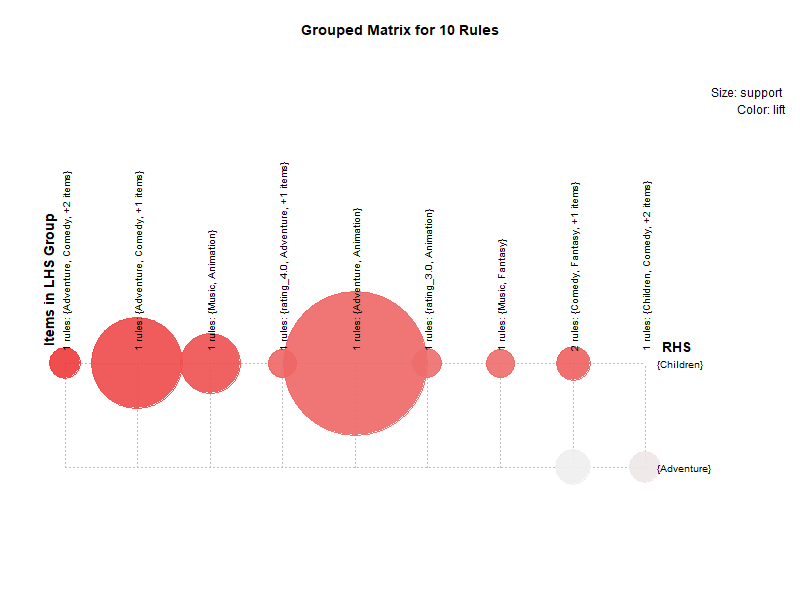

<rpy2.robjects.vectors.ListVector object at 0x0000020AC6F42B00> [RTYPES.VECSXP]
R classes: ('grouped_matrix',)
[SexpS4, StrSexpVe..., StrSexpVe..., FloatSexp..., ..., FloatSexp..., FloatSexp..., FloatSexp..., IntSexpVe...]
  rules: <class 'rpy2.robjects.methods.RS4'>
  <rpy2.robjects.methods.RS4 object at 0x0000020AC6FA99C0> [RTYPES.S4SXP]
R classes: ('rules',)
  measure: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x0000020AC6F578C0> [RTYPES.STRSXP]
R classes: ('character',)
['support']
  shading: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x0000020AC6F57780> [RTYPES.STRSXP]
R classes: ('character',)
['lift']
  lhs_label_items: <class 'numpy.ndarray'>
  array([2.])
...
  aggr.fun: <class 'numpy.ndarray'>
  array([20.])
  k: <class 'numpy.ndarray'>
  array([[10.31659315,  9.9751069 ,  9.73909439,  9.22198284,  9.18062055,
         9.05328451,  9.01922072,  9.37993187,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,  3.60297273,  3.9627584 ]])
  sAggr: <class 'numpy.ndarray'>
  array([[0.01071404, 0.02288909, 0.01654833, 0.01012964, 0.03377845,
        0.01029522, 0.01004198, 0.01132766,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan, 0.01148351, 0.01071404]])
  mAggr: <class 'numpy.ndarray'>
  array([1, 2, 3, 8, 4, 5, 6, 7, 9, 8], dtype=int32)

In [250]:
# Visualize different rules from rules1
print('Graph for rules3_8')
%R plot(rules3_8[1:10], method='grouped', engine='grid') -w 800 -h 600

Graph for rules3_9


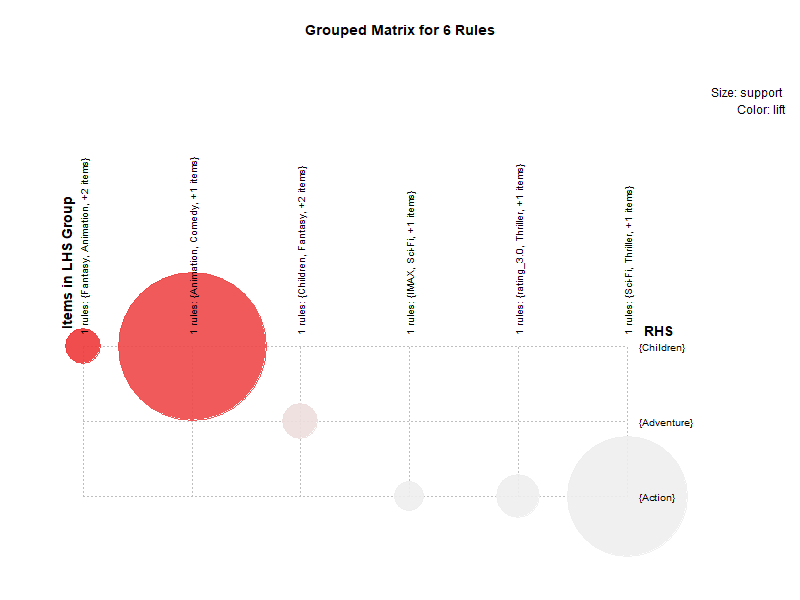

<rpy2.robjects.vectors.ListVector object at 0x0000020AC6F66900> [RTYPES.VECSXP]
R classes: ('grouped_matrix',)
[SexpS4, StrSexpVe..., StrSexpVe..., FloatSexp..., ..., FloatSexp..., FloatSexp..., FloatSexp..., IntSexpVe...]
  rules: <class 'rpy2.robjects.methods.RS4'>
  <rpy2.robjects.methods.RS4 object at 0x0000020AC72464C0> [RTYPES.S4SXP]
R classes: ('rules',)
  measure: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x0000020AC6F1B180> [RTYPES.STRSXP]
R classes: ('character',)
['support']
  shading: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x0000020AC6F9C880> [RTYPES.STRSXP]
R classes: ('character',)
['lift']
  lhs_label_items: <class 'numpy.ndarray'>
  array([2.])
...
  aggr.fun: <class 'numpy.ndarray'>
  array([20.])
  k: <class 'numpy.ndarray'>
  array([[10.31659315,  9.9751069 ,         nan,         nan,         nan,
                nan],
       [        nan,         nan,  3.9627584 ,         nan,         nan,
                nan],
       [        nan,         nan,         nan,  3.13659289,  3.10435627,
         3.08801185]])
  sAggr: <class 'numpy.ndarray'>
  array([[0.01071404, 0.02288909,        nan,        nan,        nan,
               nan],
       [       nan,        nan, 0.01071404,        nan,        nan,
               nan],
       [       nan,        nan,        nan, 0.01004198, 0.01159065,
        0.01978202]])
  mAggr: <class 'numpy.ndarray'>
  array([1, 2, 3, 4, 5, 6], dtype=int32)

In [254]:
# Visualize different rules from rules3
print('Graph for rules3_9')
%R plot(rules3_9[1:6], method='grouped', engine='grid') -w 800 -h 600

---
## <span style='color:blue'>M&E Section 4: Summarize the Ramifications [20 points]</span>
---

##### Option B: Association Rule Mining

- Summarize: Describe your results. What findings are the most compelling and why?
<br>


---
## <span style='color:blue'>Deployment [10 points total]</span>
Be critical of your performance and tell the reader how you current model might be usable by other parties.<br>
<b>- Did you achieve your goals? If not, can you reign in the utility of your modeling?</b><br><br>

<b>- How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)?</b><br>
In the movies world, if you are a studio and looking where to invest your money for the best return on investment using association rules mining can help to show which genres perform the best in terms of ratings or in terms of ROI in budget vs bo office gross. For example: Drama, Comedy, Action, Adventure and Romance are the 5 most used genre titles in the dataset while Documentary, Film-Noir, TV Movie, Family and History are the least used. We also know from our EDA that most often 3 or 2 genres are used to describe a movie...in our association rules mining we discover that the most interesting combinations are
{list top 10}
From this intelligence we can recommend to a studio that these are the most interesting combinations<br><br>

<b>- How would you deploy your model for interested parties?</b><br><br>

<b>- What other data should be collected?</b><br><br>

<b>- How often would the model need to be updated, etc.?</b><br><br>

---

---
## <span style='color:blue'>Exceptional Work [10 points total]</span>
You have free reign to provide additional analyses or combine analyses.

---

- We attempted to Mine for Association Rules for this lab without much prior experience 

- We made use of 3rd party APIs to impute missing genre information